# Splitting dataset with `splito`

A model is constructed using the **training set**, and this model is then used to make predictions for the compounds in the **test se**t. The degree of agreement between the predicted and actual activity values for the test dataset, often quantified by metrics like R-squared, serves as an assessment of the model's internal consistency and  an indicator of the model's ability to make predictions. The prediction estimate depends on the specific criteria used for selecting compounds in the **test set** when compared to the true prospective prediction scenario. 

In drug discovery projects, various data splitting strategies are employed to train and evaluate machine learning models. These strategies help ensure that the model's performance is robust and can generalize well to new, unseen data. 

Common splitting strategies are `random split`, `time series split`, `scaffold-based split`, `stratified split` etc.

This notebook demonstrates the basic usage of `splito` library for data splitting.


Example:
- **Scaffold-based split:**
    - **Approach:** Performing a scaffold split involves partitioning a chemical dataset based on common structure to ensure that the training and test sets contain distinct chemical structures while maintaining the diversity of scaffolds.
    - **Characteristics**:  In certain studies, data points may be correlated due to shared characteristics such as similar structure or same scaffold. Structure/scaffold-based splitting ensures that the model is tested on structure/scaffold it has never seen before, which is crucial for assessing its ability to generalize to new chemical structures.
    - **Application:** The effectiveness of a scaffold split depends on the diversity of scaffolds in your dataset. It's important to ensure that the selected scaffolds are representative of the chemical space you're interested in exploring. Additionally, this approach is most useful when the scaffolds have significant impact on the bioactivity or other properties of interest. Therefore, such splitting approach is often used in lead optimization stage where there are multiple advanced series of molecules with better understanding SAR to be optimized.

In [1]:
%load_ext autoreload
%autoreload 2


import datamol as dm
import splito

from utils import visualize_chemspace

## Load dataset

In [2]:
data = dm.data.chembl_drugs()  # might change to another dataset which fits for scaffold split

In [3]:
# Define scaffold split
splitter = splito.ScaffoldSplit(smiles=data.smiles.tolist(), n_jobs=-1, test_size=0.2, random_state=111)

In [4]:
train_idx, test_idx = next(splitter.split(X=data["smiles"].values))
assert train_idx.shape[0] > test_idx.shape[0]

In [5]:
data.loc[train_idx, "ScaffoldSplit"] = "train"
data.loc[test_idx, "ScaffoldSplit"] = "test"
data["scaffold"] = splitter.scaffolds

### Distribution of the compounds in the chemical space

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

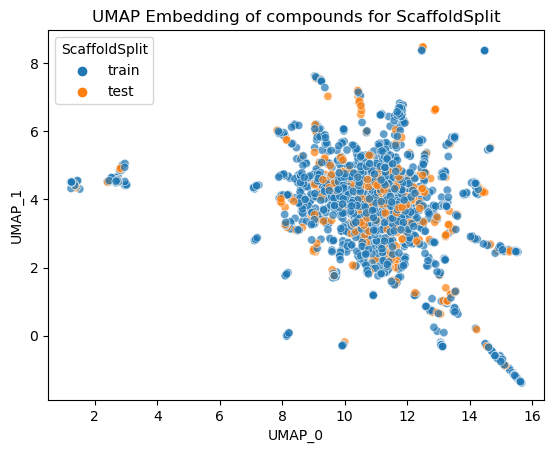

In [7]:
visualize_chemspace(data, split_names=["ScaffoldSplit"])

###  Distribution of scaffolds in chemical space

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

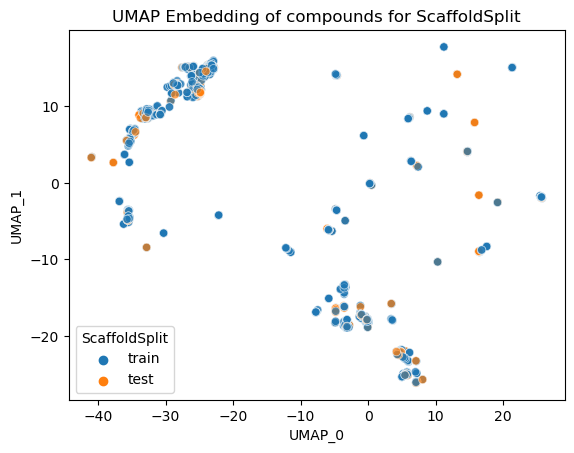

In [8]:
visualize_chemspace(data, split_names=["ScaffoldSplit"], mol_col="scaffold")

---

- The End :-)